# Credit Card Dataset 

- ID	 ID of each client
- LIMIT_BAL	 Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX	 Gender (1=male, 2=female)
- EDUCATION	 (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE	 Marital status (1=married, 2=single, 3=others)
- AGE	 Age in years
- PAY_0	 Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight - months, 9=payment delay for nine months and above)
- PAY_2	 Repayment status in August, 2005 (scale same as above)
- PAY_3	 Repayment status in July, 2005 (scale same as above)
- PAY_4	 Repayment status in June, 2005 (scale same as above)
- PAY_5	 Repayment status in May, 2005 (scale same as above)
- PAY_6	 Repayment status in April, 2005 (scale same as above)
- BILL_AMT1	 Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2	 Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3	 Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4	 Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5	 Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6	 Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1	 Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2	 Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3	 Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4	 Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5	 Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6	 Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month	 Default payment (1=yes, 0=no)
	
Inspiration	
Some ideas for exploration:	
1. How does the probability of default payment vary by categories of different demographic variables?	
2. Which variables are the strongest predictors of default payment?	
	
Acknowledgements	
Any publications based on this dataset should acknowledge the following:	
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.	
The original dataset can be found here at the UCI Machine Learning Repository.	


In [1]:
#IMPORTING PACKAGES

%matplotlib inline
import numpy as np
import pandas as pd
import sympy as sy
import pandas_profiling
import seaborn as sns
import mpl_toolkits
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border-style: solid;
        border: 3px solid lightgray;
    }
</style>

#HTML Borders

In [3]:
data = pd.read_excel('UCI_CreditCArd_Dataset.xlsx', index_col=0)
data.head(10)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   
6       50000    1          1         2   37      0      0      0      0   
7      500000    1          1         2   29      0      0      0      0   
8      100000    2          2         2   23      0     -1     -1      0   
9      140000    2          3         1   28      0      0      2      0   
10      20000    1          3         2   35     -2     -2     -2     -2   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...          0          0          0         0       689         0   
2       0  ...       3272       3455       3261         0      1000      1000   
3       0  ...      14331      14948      15549      1518      1500      1000   
4       0  ...      28314      28959      29547      2000      2019      1200   
5       0  ...      20940      19146      19131      2000     36681     10000   
6       0  ...      19394      19619      20024      2500      1815       657   
7       0  ...     542653     483003     473944     55000     40000     38000   
8       0  ...        221       -159        567       380       601         0   
9       0  ...      12211      11793       3719      3329         0       432   
10     -1  ...          0      13007      13912         0         0         0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1          0         0         0                           1  
2       1000         0      2000                           1  
3       1000      1000      5000                           0  
4       1100      1069      1000                           0  
5       9000       689       679                           0  
6       1000      1000       800                           0  
7      20239     13750     13770                           0  
8        581      1687      1542                           0  
9       1000      1000      1000                           0  
10     13007      1122         0                           0  

[10 rows x 24 columns]

In [4]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
data.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [6]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default.payment.next.month    int64
dtype: object

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

Total  Percent
default.payment.next.month      0      0.0
PAY_AMT6                        0      0.0
SEX                             0      0.0
EDUCATION                       0      0.0
MARRIAGE                        0      0.0
AGE                             0      0.0
PAY_0                           0      0.0
PAY_2                           0      0.0
PAY_3                           0      0.0
PAY_4                           0      0.0
PAY_5                           0      0.0
PAY_6                           0      0.0
BILL_AMT1                       0      0.0
BILL_AMT2                       0      0.0
BILL_AMT3                       0      0.0
BILL_AMT4                       0      0.0
BILL_AMT5                       0      0.0
BILL_AMT6                       0      0.0
PAY_AMT1                        0      0.0
PAY_AMT2                        0      0.0
PAY_AMT3                        0      0.0
PAY_AMT4                        0      0.0
PAY_AMT5                        0      0.0
LIMIT_BAL                       0      0.0

In [9]:
pandas_profiling.ProfileReport(data) 

In [10]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
data.rename(columns={'default.payment.next.month': 'default'}, inplace=True)
data.columns=data.columns.str.lower()
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [12]:
data.default.sum()/data.default.count()   # Checking average for default or threshold

0.2212

__Average default rate of credit card users is 0.2212__

Can be possibly used as threshold

In [13]:
def unique_values(data):
    print("Unique values for Sex:", data.sex.unique())
    print("Unique values for Education:", data.education.unique())
    print("Unique values for Marriage:",data.marriage.unique())
    print("Unique values for Age:",data.age.unique())
    print("Unique values for Age:",data.default.unique())
unique_values(data)

Unique values for Sex: [2 1]
Unique values for Education: [2 1 3 5 4 6 0]
Unique values for Marriage: [1 2 3 0]
Unique values for Age: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
Unique values for Age: [1 0]


- ID	 ID of each client
- LIMIT_BAL	 Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX	 Gender (1=male, 2=female)
- EDUCATION	 (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE	 Marital status (1=married, 2=single, 3=others)
- AGE	 Age in years
- PAY_0	 Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight - months, 9=payment delay for nine months and above)

__In education: Replacing 0, 5 & 6 by 4 as they are unknown__

In [14]:
data['education'] = data['education'].replace(to_replace=(0, 5, 6), value=4, regex=True)
data.education.unique()

array([2, 1, 3, 4], dtype=int64)

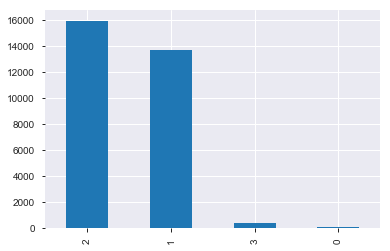

In [15]:
data['marriage'].value_counts().head(10).plot.bar()

__Replacing 0 & 3 with random values__

In [16]:
data['marriage'] = data['marriage'].replace(to_replace=(0, 3), value=np.random.choice([1, 0]), regex=True)
data.marriage.unique()

array([1, 2], dtype=int64)

Text(0.5, 1.0, 'Correlation between features')

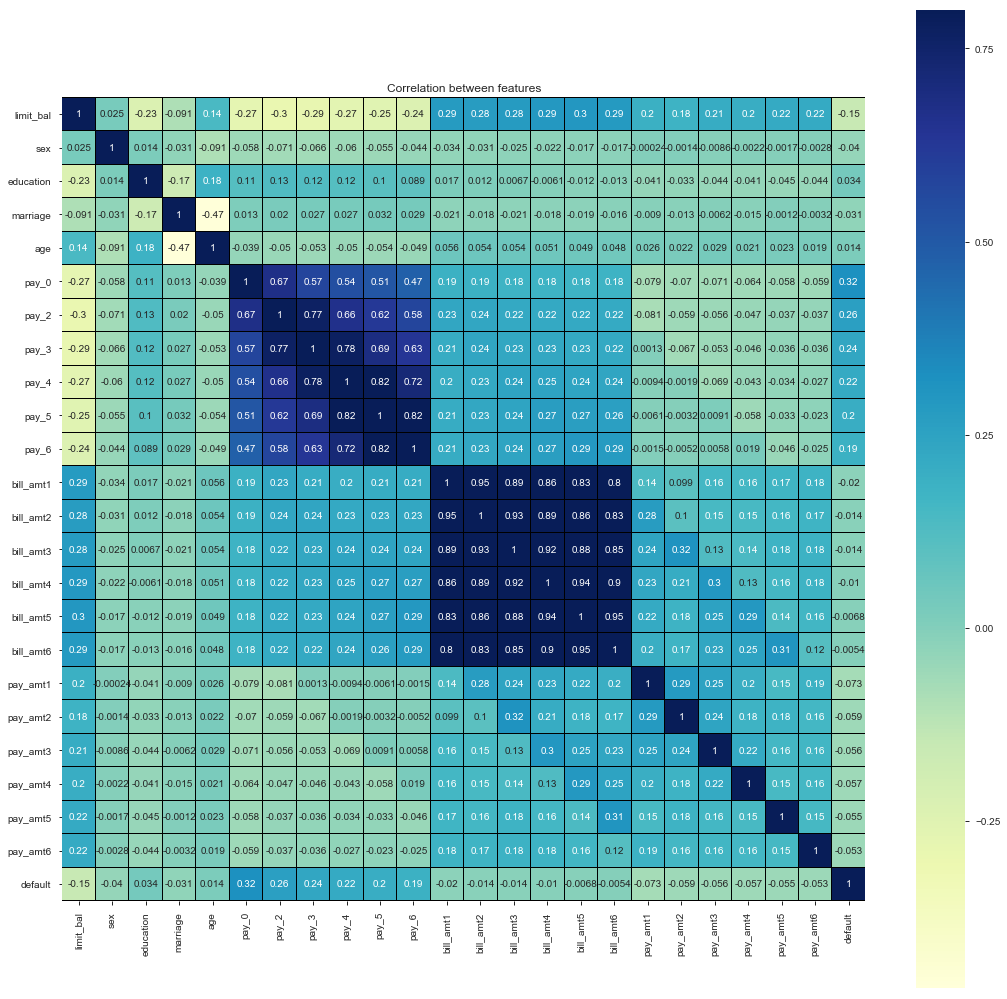

In [17]:
corr = data.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

Text(0.5, 1.0, 'Pair Plot')

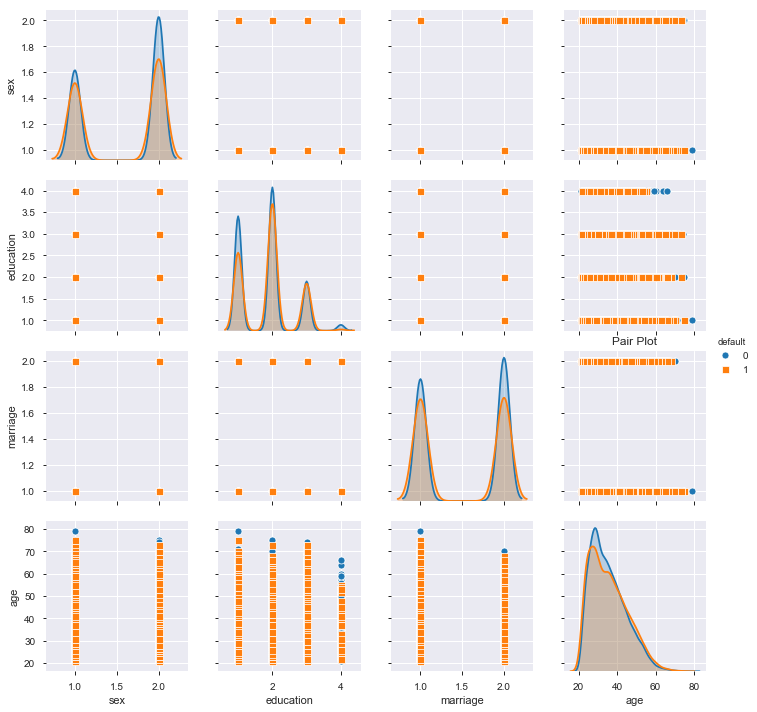

In [18]:
sns.pairplot(data[["sex","education","marriage","age","default"]],vars = ["sex","education","marriage","age"],hue="default", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

### 1 =  Default 0 = Not Default

In [19]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

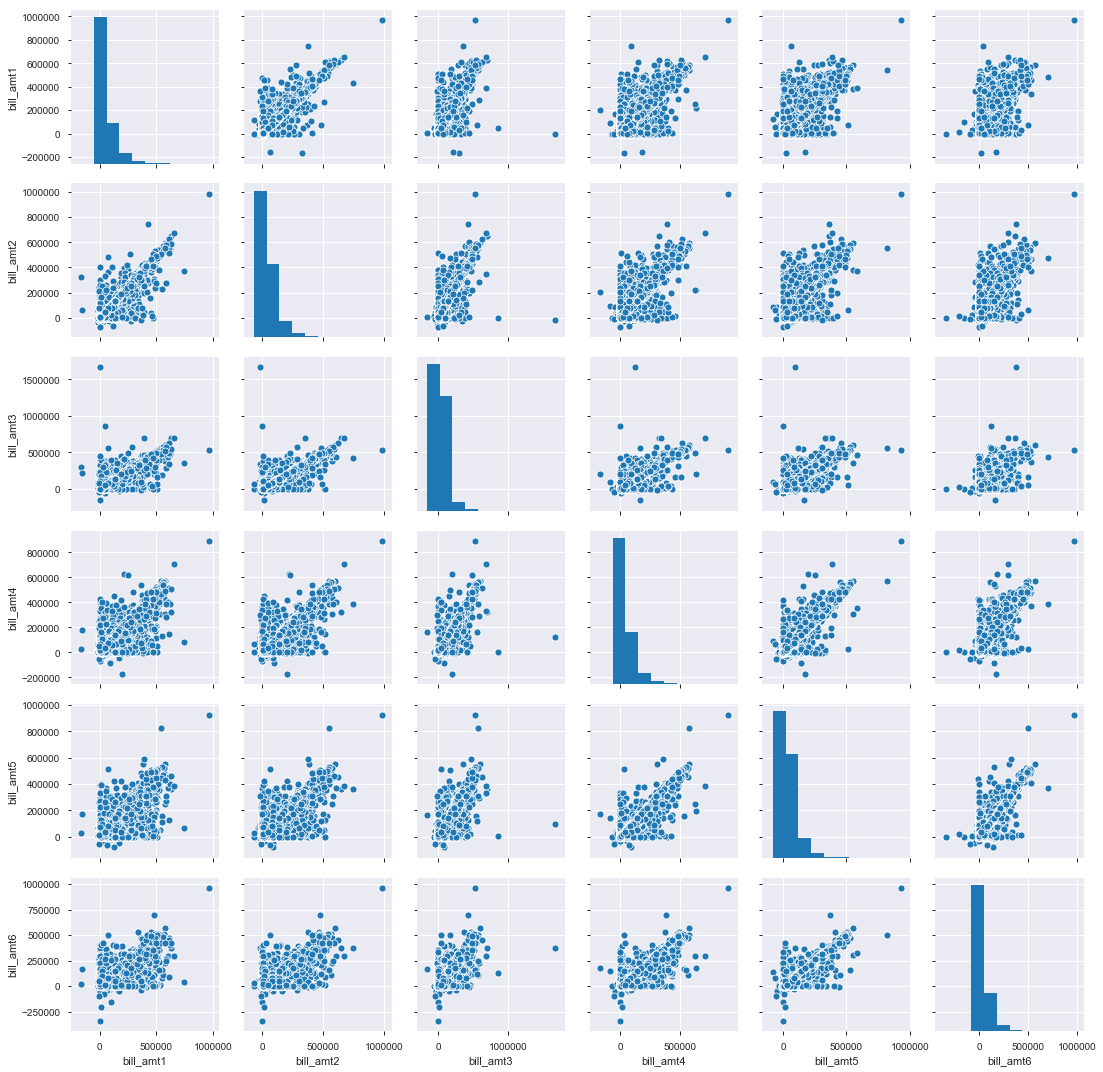

In [20]:
sns.pairplot(data, vars=data.columns[11:17], kind='scatter')

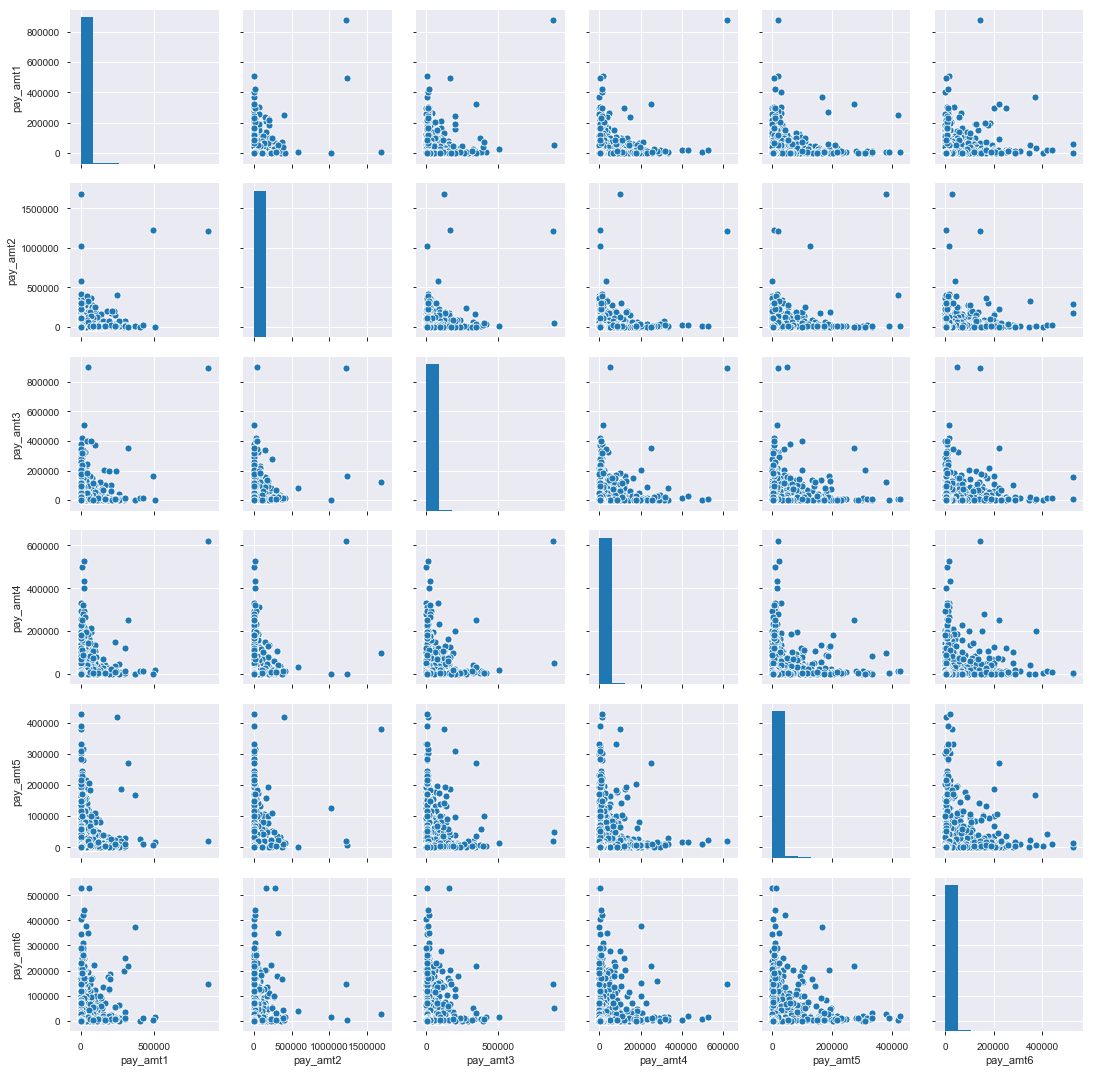

In [21]:
sns.pairplot(data, vars=data.columns[17:23], kind='scatter')

In [22]:
data.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [23]:
def unique_values(data):
    print("Unique values for pay_0:", data.pay_0.unique())
    print("Unique values for pay_2:", data.pay_2.unique())
    print("Unique values for pay_3:", data.pay_3.unique())
    print("Unique values for pay_4:", data.pay_4.unique())
    print("Unique values for pay_5:", data.pay_5.unique())
    print("Unique values for pay_6:", data.pay_6.unique())
unique_values(data)

Unique values for pay_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
Unique values for pay_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
Unique values for pay_3: [-1  0  2 -2  3  4  6  7  1  5  8]
Unique values for pay_4: [-1  0 -2  2  3  4  5  7  6  1  8]
Unique values for pay_5: [-2  0 -1  2  3  5  4  7  8  6]
Unique values for pay_6: [-2  2  0 -1  3  6  4  7  8  5]


In [24]:
data1 = data.copy(deep=True)

__Feature engineering: before fitting in our model, there are two things we need to do: standardize my numerical features and create dummies for our categorical features. Following is our code of doing standardization manually:__

In [25]:
# manually standardize numeric columns

col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
              'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

data1[col_to_norm]=data1[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

In [26]:
pay = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']  # create dummies for categorical features.
data1[pay] = data1[pay].apply(lambda x: x+2)     # add 2 to all the values because OneHotEncoder can only handle non-negative values
X = data1.iloc[:, 0:23]
y = data1.default
enc = OneHotEncoder(categorical_features=[1,2,3,5,6,7,8,9,10])
X = enc.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split  #old name cross_validation

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)
    
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (24000, 86)
y_train shape:  (24000,)

Test cases as below
X_test shape:  (6000, 86)
y_test shape:  (6000,)


## __Now we are ready to fit my models. we have defined 3 functions to: apply grid search to optimize model parameters and make prediction; plot confusion matrix; plot roc curve.__

In [28]:

# Define function to optimize model based on roc_auc 
# (for unbalanced classes, roc_auc makes more sence since the accuracy score can be fooled by only predicting 0)

def gridsearch(model, params):
    gs = GridSearchCV(model, params, scoring='roc_auc', n_jobs=-1)
    gs.fit(X_train, y_train)
    print ('Best params: ', gs.best_params_)
    print ('Best auc on training set: ', gs.best_score_)
    print ('Best auc on test set: ', gs.score(X_test, y_test))
    return gs.predict(X_test), gs.decision_function(X_test)

In [29]:
def plot_confusion(prediction):
    conmat = np.array(confusion_matrix(y_test, prediction, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['default', 'not default'], 
                             columns=['predicted default', 'predicted not default'])
    return confusion

In [30]:
def plot_roc(prob):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])

    plt.figure(figsize=[9,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('false positive rate', fontsize=18)
    plt.ylabel('true positive rate', fontsize=18)
    plt.title('ROC curve for credit default', fontsize=18)
    plt.legend(loc='lower right')
    plt.show()

In [31]:
# try using stochastic gradient descent with logistic loss function
# specify lasso regularization to select features and address multicollinearity issues

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal')

# use grid search to optimize parameters
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}

sgd_pred, sgd_prob = gridsearch(sgd, sgd_params)

Best params:  {'alpha': 0.001, 'class_weight': None}
Best auc on training set:  0.7638515149818867
Best auc on test set:  0.7666123019085462


In [32]:
# Check the accuracy score

sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal', alpha=0.001)
print ('accuracy score on training set: ', cross_val_score(sgd, X_train, y_train, n_jobs=-1).mean())
print ('accuracy score on testing set: ', accuracy_score(sgd_pred, y_test))

accuracy score on training set:  0.8205004929446691
accuracy score on testing set:  0.818


In [33]:
# create classification report
print(classification_report(y_test, sgd_pred, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.83      0.95      0.89      4663
     default       0.68      0.34      0.46      1337

   micro avg       0.82      0.82      0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [34]:
# create confusion matrix
plot_confusion(sgd_pred)

predicted default  predicted not default
default                    457                    880
not default                212                   4451

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.815

In [38]:
predictions = classifier.predict(X_test)
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 459, FP: 232, TN: 4431, FN: 878


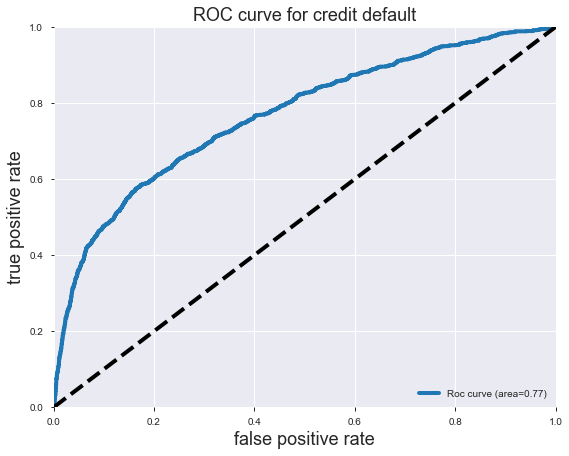

In [39]:
# plot roc curve and calculate auc
plot_roc(sgd_prob)

__There might still be multicollinearity with the models, as I did not check if the features correlated with each other were dropped. However, as long as my goal was only to make prediction, not identifying the significance of single feature, it would not be a big issue.__

## Most of the codes are copied from https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset